## **Importing libraries**

In [275]:
import numpy as np
import pandas as pd

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score

## **Importing dataset**

In [276]:
df = pd.read_csv("cardio_train.csv", sep = ";")
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [278]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [279]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

No null values are found.



## **Removing outliers & irrelevant data**

Systolic blood pressure, measures the pressure in your arteries when your heart beats.
Diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats. 
Systolic blood pressure is always greater than diastolic blood pressure.

In [280]:
df[(df['ap_lo'] > df['ap_hi'])]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
228,314,17489,2,183,98.0,160,1100,1,2,1,0,1,1
241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1
260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1
329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1
345,482,18704,1,154,81.0,140,1000,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,1,1,0,0,1,1
69872,99798,21808,1,152,56.0,160,1000,1,1,0,0,1,1
69878,99807,21239,2,168,95.0,160,1000,1,1,0,0,1,1
69885,99816,22417,2,166,78.0,170,1000,1,1,0,0,0,0


There are 1000+ rows of data where systoic blood pressure > diastolic blood pressure. This is not possible. Hence we drop those rows of data.

In [281]:
df.drop(df[(df['ap_lo'] > df['ap_hi'])].index,inplace=True)

In [282]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000
mean,49976.959878,19464.145188,1.348617,164.359916,74.114962,128.839601,81.245776,1.364657,1.225577,0.087878,0.053340,0.803449,0.494765
std,28842.637757,2468.319995,0.476536,8.190703,14.332163,155.201462,9.694132,0.678876,0.571441,0.283119,0.224713,0.397392,0.499976
min,0.000000,10798.000000,1.000000,55.000000,11.000000,12.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25008.250000,17657.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50020.500000,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74865.750000,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


We also notice than min & max values of ap_hi and ap_lo are outliers. We must remove them. 
We confirm this by drawing a box-plot of that variable and see outliers.
We also check for outliers on other fields too.

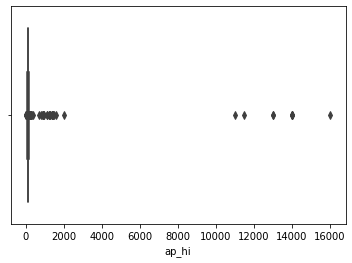

In [283]:
import seaborn as sns
sns.boxplot(x = df["ap_hi"])

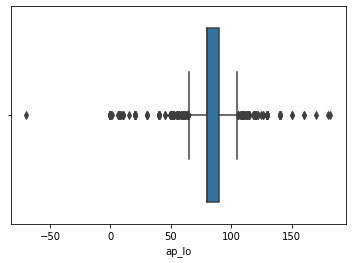

In [284]:
sns.boxplot(x = df["ap_lo"])

In [285]:
def remove_outliers(field):
    quantile1 = df[field].quantile(0.25)
    quantile2 = df[field].quantile(0.50)
    quantile3 = df[field].quantile(0.75)
    IQR = quantile3 - quantile1
    lower_bound = quantile1 - 1.5*IQR
    upper_bound = quantile3 + 1.5*IQR

    remove_filter = df[(df[field] > upper_bound) | (df[field] < lower_bound)]
    print("Removing these columns because they are outliers for field {}".format(field))
    print(remove_filter)
    df.drop(remove_filter.index, inplace = True)

In [286]:
remove_outliers("ap_hi")

Removing these columns because they are outliers for field ap_hi
          id    age  gender  height  weight  ...  gluc  smoke  alco  active  cardio
59        74  20431       1     164    64.0  ...     1      1     0       1       1
61        79  20960       2     165    75.0  ...     1      0     0       1       1
101      136  18718       1     167    80.0  ...     1      0     1       0       0
209      288  18169       2     172    62.0  ...     1      0     0       1       0
230      318  23376       2     175    75.0  ...     1      1     1       1       1
...      ...    ...     ...     ...     ...  ...   ...    ...   ...     ...     ...
69587  99398  23223       1     169   101.0  ...     1      0     0       0       1
69593  99405  16781       2     179    93.0  ...     2      0     1       1       1
69830  99734  22552       2     163    67.0  ...     1      0     0       0       1
69894  99835  16857       1     160    70.0  ...     2      0     0       1       1
69997  9999

In [287]:
remove_outliers("ap_lo")

Removing these columns because they are outliers for field ap_lo
          id    age  gender  height  weight  ...  gluc  smoke  alco  active  cardio
4          4  17474       1     156    56.0  ...     1      0     0       0       0
9         14  19834       1     164    68.0  ...     1      0     0       0       0
23        33  23376       2     156    45.0  ...     1      0     0       1       0
43        58  20556       2     159    63.0  ...     1      0     0       1       1
50        65  18238       1     160    75.0  ...     1      0     0       0       0
...      ...    ...     ...     ...     ...  ...   ...    ...   ...     ...     ...
69922  99878  15334       1     165    62.0  ...     1      0     0       1       0
69929  99891  19834       1     164    85.0  ...     3      0     0       1       1
69932  99897  15243       2     171    67.0  ...     1      0     0       1       0
69937  99908  14489       1     160    53.0  ...     1      0     0       1       0
69978  9996

In [288]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,64500.000000,64500.000000,64500.000000,64500.000000,64500.000000,64500.000000,64500.000000,64500.000000,64500.000000,64500.000000,64500.000000,64500.000000,64500.000000
mean,49966.534946,19491.981225,1.351876,164.456961,74.261272,126.624527,81.788868,1.364264,1.225659,0.087612,0.053054,0.803488,0.498388
std,28856.092134,2458.769607,0.477559,8.148030,14.142237,14.383593,7.712722,0.680277,0.572670,0.282733,0.224143,0.397363,0.500001
min,0.000000,10859.000000,1.000000,55.000000,11.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24923.750000,17720.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50009.500000,19716.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74879.250000,21343.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


By now, we have dropped 5500 rows of data

## **Splitting into dependent and independent variables**

ID column is not necessary for classification, so we can drop it.

In [289]:
df.drop("id",axis=1,inplace=True)

In [290]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
5,21914,1,151,67.0,120,80,2,2,0,0,0,0


In [291]:
x = df.iloc[:,:-1].values
x
print(x[0])

[1.8393e+04 2.0000e+00 1.6800e+02 6.2000e+01 1.1000e+02 8.0000e+01
 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00]


In [292]:
y = df.iloc[:,-1].values
y

array([0, 1, 1, ..., 1, 1, 0])

## **Splitting into training and testing set**

We split the dataset into training & testing set in ratio of 80:20

In [293]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

## **Normalising values in independent variable**

We use StandardScaler library for normalising values in X. StandardScaler calculates standard score of sample x as (x-u)/s, where u is mean of training samples & s is standard deviation

In [294]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## **Logistic Regression**

We have defined an array to collect accuracies & confusion matrices of the models we are going to use, for later comparison.

In [295]:
models = ["Logistic Regression", "K Nearest Neighbors", "Decision tree classifier"]
accuracies = []
confusion_matrices = []

A utility function for displaying different elements of confusion matrix for ease of use.

In [296]:
def describe_confusion_matrix( cm ):
    print("True positives: {}".format(cm[1][1]))
    print("True negatives: {}".format(cm[0][0]))
    print("False positives: {}".format(cm[0][1]))
    print("False negatives: {}".format(cm[1][0]))
    

In [297]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
predictions = [round(value) for value in y_pred]

In [298]:
accuracy = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, y_pred)
accuracies.append(accuracy)
print("Accuracy: {}".format(accuracy * 100))
confusion_matrices.append(cm)
print(cm)
describe_confusion_matrix(cm)

Accuracy: 71.3875968992248
[[4967 1489]
 [2202 4242]]
True positives: 4242
True negatives: 4967
False positives: 1489
False negatives: 2202


## **K Nearest neighbors**

We found the optimal value of K=13 from the plot shown below. We notice that at k=13, accuracy is high & also false negatives are minimised.

In [299]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 13, p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [300]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
confusion_matrices.append(cm)
print("Accuracy: {}".format(accuracy * 100))
print(cm)
describe_confusion_matrix(cm)

Accuracy: 70.65891472868216
[[4701 1755]
 [2030 4414]]
True positives: 4414
True negatives: 4701
False positives: 1755
False negatives: 2030


Finding optimal K optimising for accuracy & false negatives. Comment this code because it takes a long time to run.

In [301]:
# knn_accuracies = []
# knn_false_negatives = []

# for i in range(1,35):    
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(x_train,y_train)
#     y_pred = knn.predict(x_test)
#     knn_accuracies.append(accuracy_score(y_test, y_pred))
#     cm = confusion_matrix(y_test, y_pred)
#     fn = cm[1][0]
#     knn_false_negatives.append(fn)

From the below graphs, we can see that k=13 gives high accuracy & low false negatives.

In [302]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,6))
# plt.plot( range(1, 35), knn_accuracies, color='#003f5c', linestyle='-.', marker='o',markersize=10, markerfacecolor='#ff6361')
# plt.title('Accuracy vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Accuracy')

In [303]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,6))
# plt.plot( range(1, 35), knn_false_negatives, color='#003f5c', linestyle='-.', marker='o',markersize=10, markerfacecolor='#ff6361')
# plt.title('False negatives vs. K Value')
# plt.xlabel('K')
# plt.ylabel('False negatives')

## **Decision Tree classifier**




Here, we have passed max_depth = 9 to avoid overfit. This value was found from the plot below.

In [304]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=9)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [305]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
confusion_matrices.append(cm)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
print("Accuracy: {}".format(accuracy * 100))
print(cm)
describe_confusion_matrix(cm)

Accuracy: 71.58914728682171
[[4687 1769]
 [1896 4548]]
True positives: 4548
True negatives: 4687
False positives: 1769
False negatives: 1896


Plotting a graph of accuracy v.s max_depth & false_negatives v.s. max_depth to find optimal value, to avoid overfit.

In [306]:
decision_accuracies = []
decision_fn=[]

from sklearn.tree import DecisionTreeClassifier
for i in range(1,20):
    classifier = DecisionTreeClassifier(criterion = 'entropy',  max_depth=i)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: {}".format(accuracy * 100))
    decision_fn.append(cm[1][0])
    decision_accuracies.append(accuracy)

Accuracy: 70.30232558139535
Accuracy: 70.30232558139535
Accuracy: 71.48062015503875
Accuracy: 71.68992248062015
Accuracy: 71.76744186046513
Accuracy: 71.8062015503876
Accuracy: 71.69767441860465
Accuracy: 71.58914728682171
Accuracy: 71.6046511627907
Accuracy: 71.03100775193798
Accuracy: 70.51937984496124
Accuracy: 70.70542635658916
Accuracy: 70.4108527131783
Accuracy: 70.10852713178295
Accuracy: 69.40310077519379
Accuracy: 68.97674418604652
Accuracy: 68.46511627906978
Accuracy: 67.55038759689921
Accuracy: 67.32558139534883


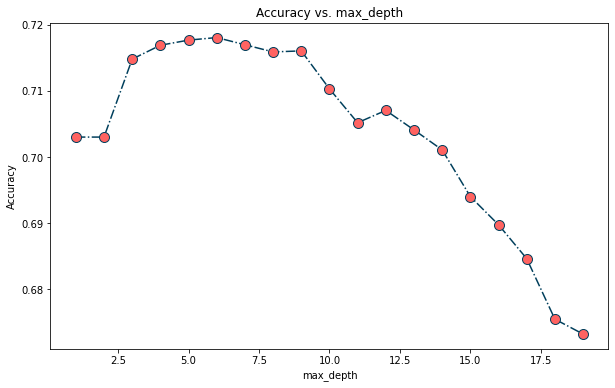

In [307]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot( range(1, 20), decision_accuracies, color='#003f5c', linestyle='-.', marker='o',markersize=10, markerfacecolor='#ff6361')
plt.title('Accuracy vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

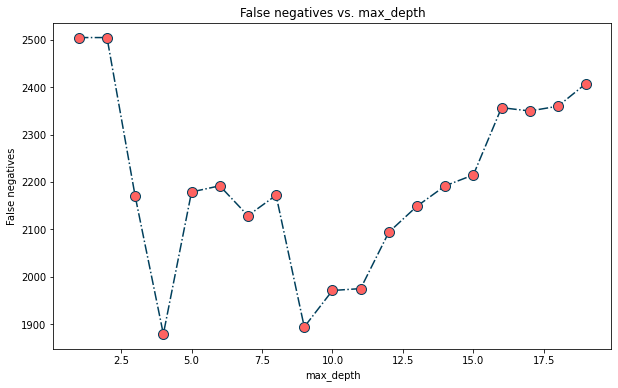

In [308]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot( range(1, 20), decision_fn, color='#003f5c', linestyle='-.', marker='o',markersize=10, markerfacecolor='#ff6361')
plt.title('False negatives vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('False negatives')
plt.show()

## **Summarising all accuracies**

In [309]:
print(models)
accuracies = [x*100 for x in accuracies]
accuracies

['Logistic Regression', 'K Nearest Neighbors', 'Decision tree classifier']


[71.3875968992248, 70.65891472868216, 71.58914728682171]

In [310]:
confusion_matrices

[array([[4967, 1489],
        [2202, 4242]]), array([[4701, 1755],
        [2030, 4414]]), array([[4687, 1769],
        [1896, 4548]])]

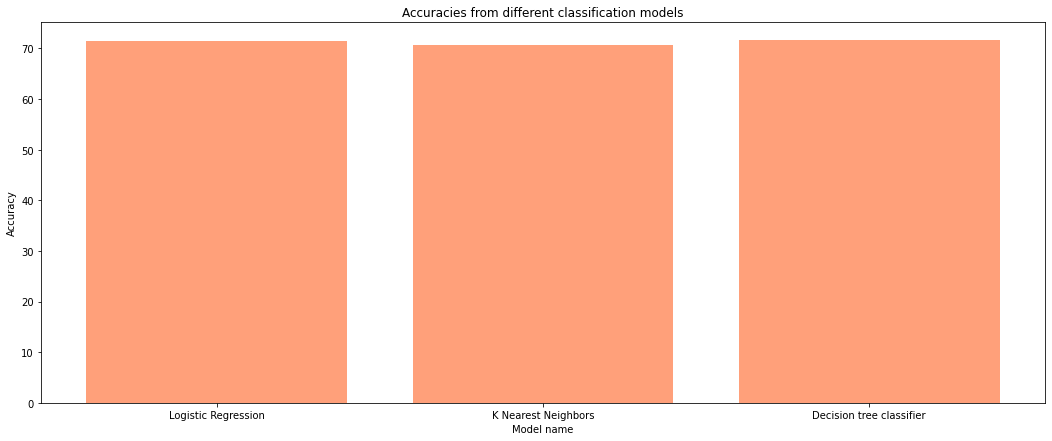

In [311]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(18,7))
plt.bar(models,accuracies, color = "#FFA07A")
plt.title("Accuracies from different classification models")
plt.ylabel("Accuracy")
plt.xlabel("Model name")
plt.savefig("accuracy.png")
plt.show()

**Pruning**

Commented because it takes a long time to run. (1.5hr+)

In [312]:
# clf = DecisionTreeClassifier(random_state=0, criterion = 'entropy')
# path = clf.cost_complexity_pruning_path(x_train, y_train)
# ccp_alphas, impurities = path.ccp_alphas, path.impurities
# len(ccp_alphas)

In [313]:
# fig, ax = plt.subplots()
# ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
# ax.set_xlabel("effective alpha")
# ax.set_ylabel("total impurity of leaves")
# ax.set_title("Total Impurity vs effective alpha for training set")

In [314]:
# clfs = []
# for ccp_alpha in ccp_alphas:
#     clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, criterion = 'entropy')
#     clf.fit(x_train, y_train)
#     clfs.append(clf)
# print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
#       clfs[-1].tree_.node_count, ccp_alphas[-1]))

In [315]:
# clfs = clfs[:-1]
# ccp_alphas = ccp_alphas[:-1]

# node_counts = [clf.tree_.node_count for clf in clfs]
# depth = [clf.tree_.max_depth for clf in clfs]
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
# ax[0].set_xlabel("alpha")
# ax[0].set_ylabel("number of nodes")
# ax[0].set_title("Number of nodes vs alpha")
# ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
# ax[1].set_xlabel("alpha")
# ax[1].set_ylabel("depth of tree")
# ax[1].set_title("Depth vs alpha")
# fig.tight_layout()

In [316]:
# train_scores = [clf.score(x_train, y_train) for clf in clfs]
# test_scores = [clf.score(x_test, y_test) for clf in clfs]

In [317]:
# maxpos=test_scores.index(max(test_scores))

# fig, ax = plt.subplots(figsize=(20,10))
# ax.set_xlabel("alpha")
# ax.set_ylabel("accuracy")
# ax.set_title("Accuracy vs alpha for training and testing sets")
# ax.plot(ccp_alphas, train_scores, marker='o', label="train",
#         drawstyle="steps-post")
# ax.plot(ccp_alphas, test_scores, marker='o', label="test",
#         drawstyle="steps-post")
# ax.legend()
# plt.show()
# print(maxpos)
# ccp_alphas[maxpos]

## **Visualizations**

Dataset gender composition

In [318]:
df["gender"].value_counts()

1    41804
2    22696
Name: gender, dtype: int64

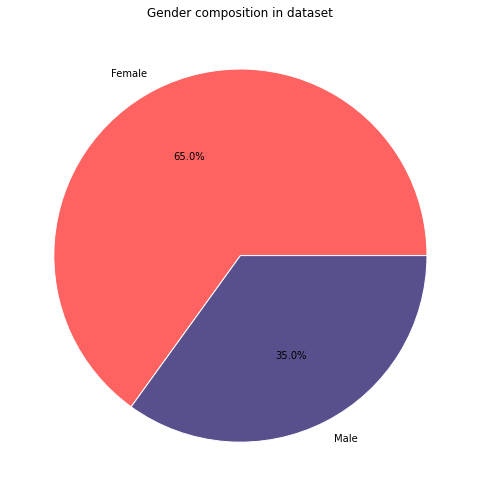

In [319]:
labels = ["Female", "Male"]
gender_count = [45530, 24470]
gender_pie_colors = ["#ff6361", "#58508d"]
f, ax = plt.subplots(figsize=(15,7))
plt.pie(gender_count, labels = labels, colors = gender_pie_colors, autopct = '%1.1f%%', wedgeprops={ "edgecolor": "white" })


plt.title("Gender composition in dataset")
plt.tight_layout()
plt.savefig("gender.png")
plt.show()

% of people having cardiovascular disease in dataset

In [320]:
df["cardio"].value_counts()

0    32354
1    32146
Name: cardio, dtype: int64

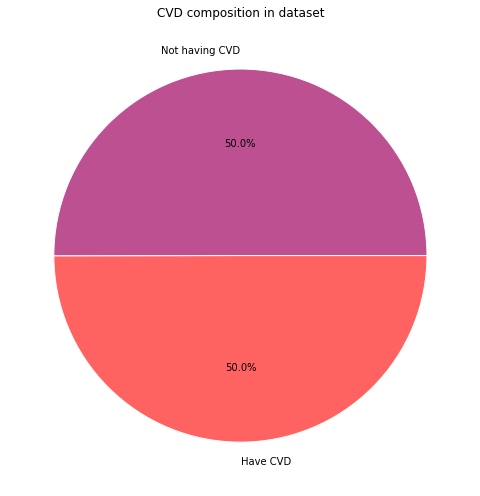

In [321]:
labels = ["Not having CVD", "Have CVD"]
cvd_count = [35021, 34979]
cvd_pie_colors = ["#bc5090", "#ff6361"]
explode = [ 0, 0.15]
f, ax = plt.subplots(figsize=(15,7))
plt.pie(cvd_count, labels = labels, colors = cvd_pie_colors, autopct = '%1.1f%%', wedgeprops={ "edgecolor": "white" })


plt.title("CVD composition in dataset")
plt.tight_layout()
plt.savefig("cvd.png")
plt.show()

In [322]:
df["gluc"].value_counts()

1    54886
3     4941
2     4673
Name: gluc, dtype: int64

In [323]:
df["cholesterol"].value_counts()

1    48461
2     8583
3     7456
Name: cholesterol, dtype: int64

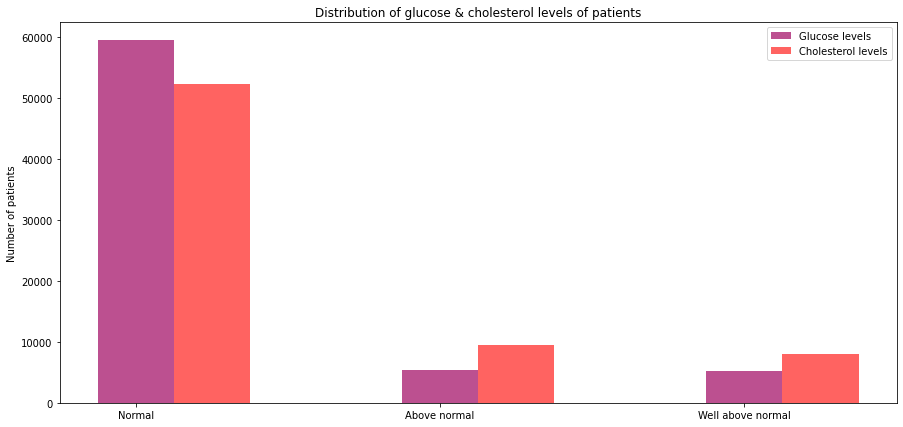

In [324]:
labels = ["Normal", "Above normal", "Well above normal"]
gluc_count = [59479, 5331, 5190]
chol_count = [52385, 9549, 8066]

x_indices = np.arange(len(labels))
bar_width = 0.25
f, ax = plt.subplots(figsize=(15,7))
plt.bar(x_indices, gluc_count, width=bar_width, color = "#bc5090",label = "Glucose levels")
plt.bar(x_indices + bar_width, chol_count, width=bar_width, color="#ff6361", label = "Cholesterol levels")

plt.xticks(x_indices, labels)
plt.legend()
plt.title("Distribution of glucose & cholesterol levels of patients")
plt.ylabel("Number of patients")
#plt.xlabel("Categories of glucose & cholesterol levels")
plt.savefig("glucose and cholestrol.png")
plt.show()

In [325]:
df["smoke"].value_counts()

0    58849
1     5651
Name: smoke, dtype: int64

In [326]:
df["active"].value_counts()

1    51825
0    12675
Name: active, dtype: int64

In [327]:
df["alco"].value_counts()

0    61078
1     3422
Name: alco, dtype: int64

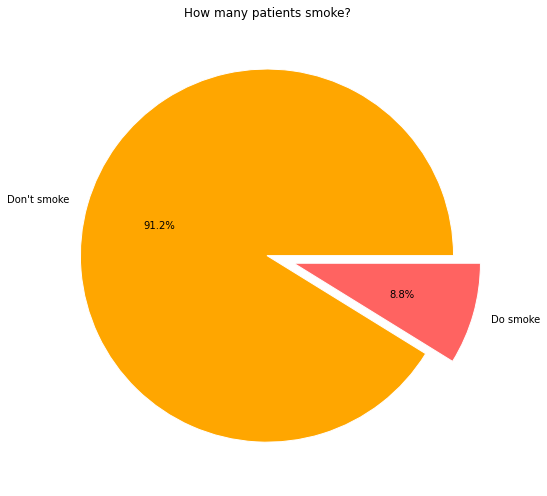

In [328]:
labels = ["Don't smoke", "Do smoke"]
smoke_count = [63831, 6169]
smoke_pie_colors = ["#ffa600", "#ff6361"]
explode = [ 0, 0.15]
f, ax = plt.subplots(figsize=(15,7))
plt.pie(smoke_count, labels = labels, explode = explode,colors = smoke_pie_colors, autopct = '%1.1f%%', wedgeprops={ "edgecolor": "white" })


plt.title("How many patients smoke?")
plt.savefig("smoke.png")
plt.tight_layout()
plt.show()

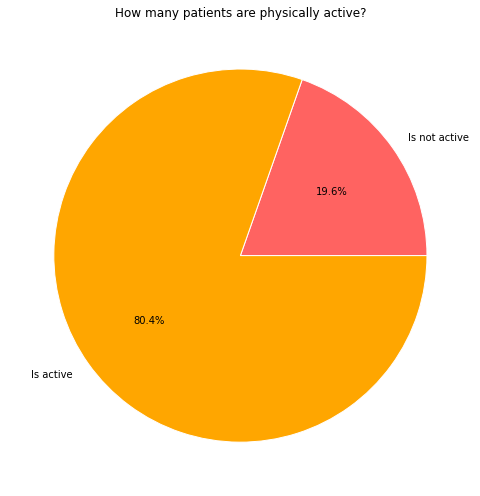

In [329]:
labels = ["Is not active", "Is active"]
active_count = [13739, 56261]
active_pie_colors = ["#ff6361", "#ffa600"]
f, ax = plt.subplots(figsize=(15,7))
plt.pie(active_count, labels = labels,colors = active_pie_colors, autopct = '%1.1f%%', wedgeprops={ "edgecolor": "white" })


plt.title("How many patients are physically active?")
plt.tight_layout()
plt.savefig("active.png")
plt.show()

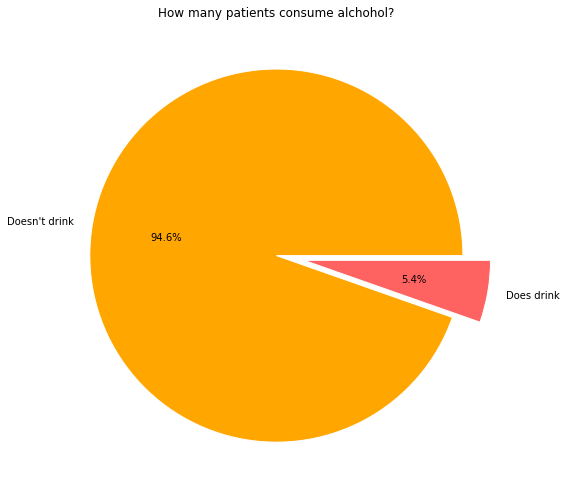

In [330]:
labels = ["Doesn't drink", "Does drink"]
alco_count  = [66236, 3764]
alco_pie_colors = ["#ffa600", "#ff6361"]
explode = [ 0, 0.15]
f, ax = plt.subplots(figsize=(15,7))
plt.pie(alco_count, labels = labels, colors = alco_pie_colors, explode = explode,autopct = '%1.1f%%', wedgeprops={ "edgecolor": "white" })


plt.title("How many patients consume alchohol?")
plt.tight_layout()
plt.savefig("alcohol.png")
plt.show()

Let's plot bar graph distribution of patient's age with cardio

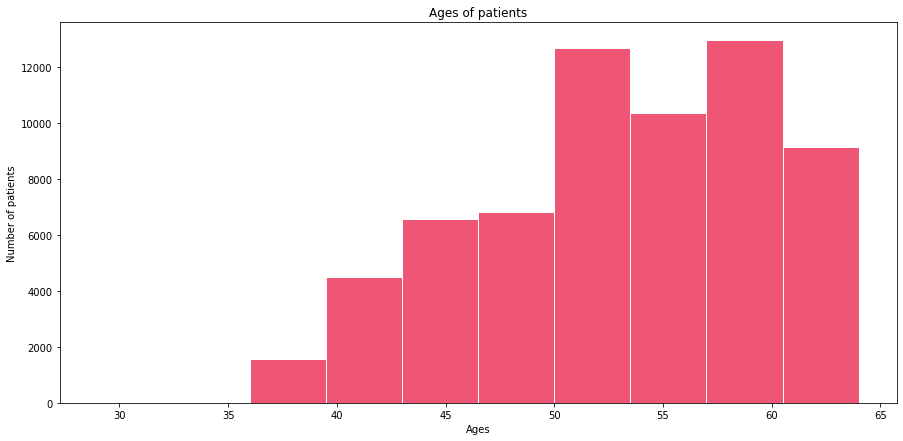

In [331]:
ages_in_years = df["age"].div(365).apply(lambda x : int(x))
f, ax = plt.subplots(figsize=(15,7))
plt.hist(ages_in_years, edgecolor = "white", color = "#ef5675")

plt.title("Ages of patients")
plt.xlabel("Ages")
plt.ylabel("Number of patients")
plt.savefig("age.png")
plt.show()

(32146, 12)
(32354, 12)
(64500, 12)


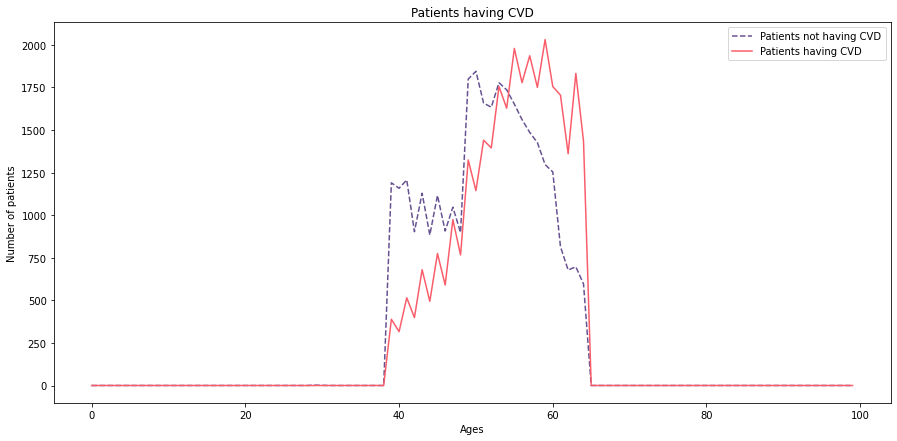

In [332]:
ages_in_years = df["age"].div(365).apply(lambda x : int(x))

remove_filter = df[(df["cardio"] == 0)]
df_cvd = df.drop(remove_filter.index)


remove_filter = df[(df["cardio"] == 1)]
df_no_cvd = df.drop(remove_filter.index)

age_cvd = df_cvd["age"].div(365).apply(lambda x : int(x))
age_no_cvd = df_no_cvd["age"].div(365).apply(lambda x : int(x))

ages = [x for x in range(0,100)]
agewise_cvd = [0]*100
agewise_no_cvd = [0]*100

for age in age_cvd:
    agewise_cvd[age]+=1

for age in age_no_cvd:
    agewise_no_cvd[age]+=1
f, ax = plt.subplots(figsize=(15,7))

plt.plot(ages, agewise_no_cvd, color="#665191", linestyle = "--", label = "Patients not having CVD")
plt.plot(ages, agewise_cvd, color="#f95d6a",label = "Patients having CVD")

#For debugging purposes
print(df_cvd.shape)
print(df_no_cvd.shape)
print(df.shape)


#plt.plot(age_cvd, color = "#f95d6a",alpha = 0.5, label = "Patients having CVD")
#plt.plot(age_no_cvd, color = "#2f4b7c",alpha = 0.5, label = "Patients not having CVD")

plt.legend()
plt.title("Patients having CVD")
plt.xlabel("Ages")
plt.ylabel("Number of patients")

plt.show()

## **Choosing features**

Upon dropping least correlated features, we observed an insignificant improvement to accuracy, but significant increase in false negatives.

From the heat-map, least correlated features were: height, smoke, active, alco.

In [333]:
df_temp = df
df_temp.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
5,21914,1,151,67.0,120,80,2,2,0,0,0,0


In [334]:
df_temp.drop("height",axis=1,inplace=True)
df_temp.drop("smoke",axis=1,inplace=True)
df_temp.drop("alco",axis=1,inplace=True)
df_temp.drop("active",axis=1,inplace=True)

In [335]:
df_temp

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,cardio
0,18393,2,62.0,110,80,1,1,0
1,20228,1,85.0,140,90,3,1,1
2,18857,1,64.0,130,70,3,1,1
3,17623,2,82.0,150,100,1,1,1
5,21914,1,67.0,120,80,2,2,0
...,...,...,...,...,...,...,...,...
69994,21074,1,80.0,150,80,1,1,1
69995,19240,2,76.0,120,80,1,1,0
69996,22601,1,126.0,140,90,2,2,1
69998,22431,1,72.0,135,80,1,2,1


In [336]:
x = df_temp.iloc[:,:-1].values
x
print(x[0])

[1.8393e+04 2.0000e+00 6.2000e+01 1.1000e+02 8.0000e+01 1.0000e+00
 1.0000e+00]


In [337]:
y = df_temp.iloc[:,-1].values
y

array([0, 1, 1, ..., 1, 1, 0])

In [338]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [339]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [340]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
predictions = [round(value) for value in y_pred]

In [341]:
accuracy = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy: {}".format(accuracy * 100))
print(cm)
describe_confusion_matrix(cm)

Accuracy: 71.17054263565892
[[4991 1465]
 [2254 4190]]
True positives: 4190
True negatives: 4991
False positives: 1465
False negatives: 2254


In [342]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 13, p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [343]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy * 100))
print(cm)
describe_confusion_matrix(cm)

Accuracy: 70.71317829457364
[[4728 1728]
 [2050 4394]]
True positives: 4394
True negatives: 4728
False positives: 1728
False negatives: 2050


We can observe nearly the same accuracy & increased false negatives.